In [1]:
import numpy as np

#Parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

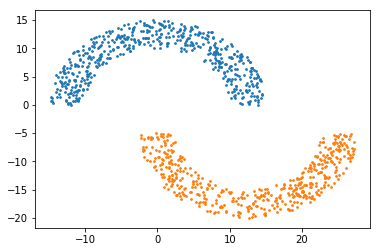

In [3]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 3)
plt.scatter(X2,Y2,s = 3)
plt.show()

In [4]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

In [5]:
def graph_plot(weight,df):
    slope = -(weight[1]/weight[2])  
    intercept = -weight[0]/weight[2]

    #Plot DATA POINTS on graph
    print("Slope:",slope)
    print("Intercept:",intercept)
    print("Weight:",weight)
    linespan = np.linspace(-20, 30, 1000)
    plt.plot(linespan, slope*linespan +intercept, '-g') 
    plt.scatter(X1,Y1,s = 1)
    plt.scatter(X2,Y2,s = 1)
    plt.show()


Initial Weight: [0. 0. 0.]
Count 2
Slope: 0.003385959668579435
Intercept: -0.08604722698729585
Weight: [ 3.         -0.11805004 34.86457501]


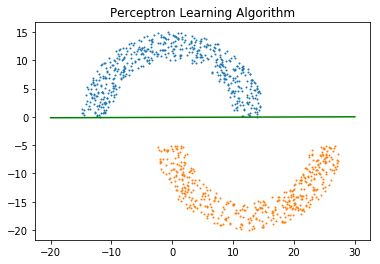

In [6]:
from pandas import DataFrame
def perceptron_algo(x,y):
    
    w = np.zeros(len(x[0]))
    flag = False
    count =0
    print("Initial Weight:",w)
    while flag != True:
        flag = True
        for i in range(len(x)):
            if(np.dot(x[i],w)*y[i] <=0):
                
                w[0]= w[0] + x[i,0]*y[i]
                w[1]= w[1] + x[i,1]*y[i]
                w[2]= w[2] + x[i,2]*y[i]
                flag =False
        
        count += 1
    print("Count", count)
    return w


#Function call
weight = perceptron_algo(data[:,0:3],data[:,3])
df = DataFrame(dict(bias=data[:,0], x=data[:,1], y=data[:,2], label=data[:,3]))

plt.title("Perceptron Learning Algorithm")
graph_plot(weight,df)



Slope: 0.13097955996840216
Intercept: -3.2937436508663156
Weight: [ 0.25778096 -0.01025096  0.07826382]


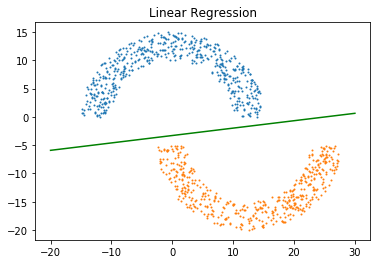

In [9]:
def linear_regression(x,y):
    X_x = np.linalg.inv((np.matmul(np.transpose(x),x)))
    x_ = np.matmul(X_x, np.transpose(x))
    w = np.matmul(x_,y)
    return w


weight = linear_regression(data[:,0:3],data[:,3])
df = DataFrame(dict(bias=data[:,0], x=data[:,1], y=data[:,2], label=data[:,3]))

plt.title("Linear Regression")
graph_plot(weight,df)